<a href="https://colab.research.google.com/github/Eserhimas/Fundamentals/blob/main/air_passengers_prophet_ts.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install prophet

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet

from google.colab import drive

In [3]:
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [4]:
path = '/content/gdrive/MyDrive/Repository/Datasets/Air Passengers/AirPassengers.csv'

data = pd.read_csv(path)
data.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [5]:
data['Month'] = pd.to_datetime(data['Month'])
data.columns = ['ds', 'y']

In [6]:
data.head()

,ds,y
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


In [13]:
model = Prophet(seasonality_mode = 'multiplicative')
model.fit(data)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpv0d9kjbi/0ww8b76_.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpv0d9kjbi/l9cmlqkt.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=33102', 'data', 'file=/tmp/tmpv0d9kjbi/0ww8b76_.json', 'init=/tmp/tmpv0d9kjbi/l9cmlqkt.json', 'output', 'file=/tmp/tmpv0d9kjbi/prophet_modelgzg0tzhj/prophet_model-20240102162112.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:21:12 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:21:12 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


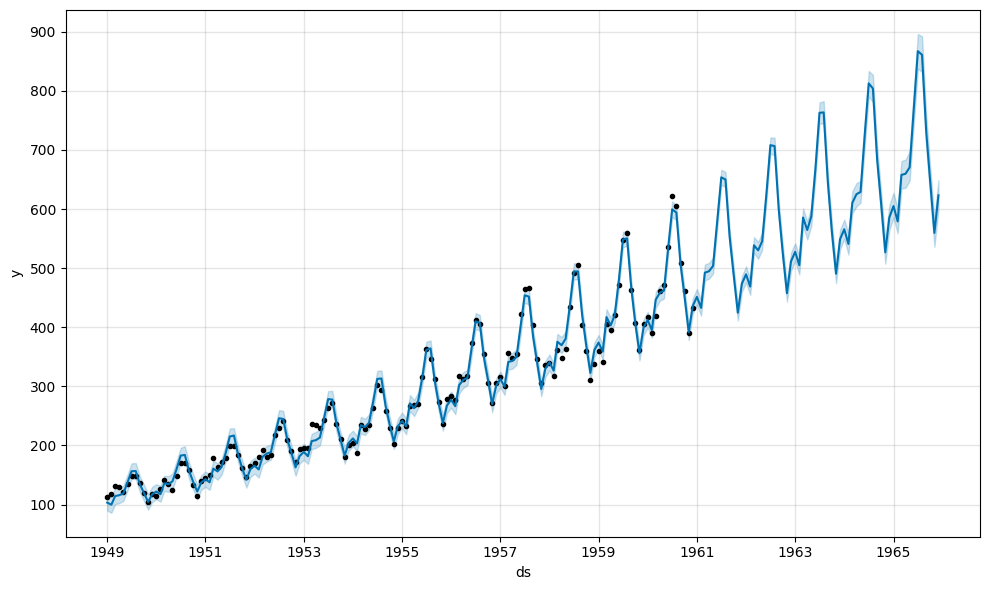

In [14]:
future = model.make_future_dataframe(periods=12*5, freq='MS')
pred = model.predict(future)
fig = model.plot(pred)
plt.show()

In [11]:
pred

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yearly,yearly_lower,yearly_upper,additive_terms,additive_terms_lower,additive_terms_upper,yhat
0,1949-01-01,113.457154,89.685859,115.984253,113.457154,113.457154,-0.090209,-0.090209,-0.090209,-0.090209,-0.090209,-0.090209,0.0,0.0,0.0,103.222279
1,1949-02-01,115.212069,87.845605,113.396012,115.212069,115.212069,-0.133979,-0.133979,-0.133979,-0.133979,-0.133979,-0.133979,0.0,0.0,0.0,99.776094
2,1949-03-01,116.797153,101.491020,127.712207,116.797153,116.797153,-0.021072,-0.021072,-0.021072,-0.021072,-0.021072,-0.021072,0.0,0.0,0.0,114.336052
3,1949-04-01,118.552067,102.125505,129.451005,118.552067,118.552067,-0.023166,-0.023166,-0.023166,-0.023166,-0.023166,-0.023166,0.0,0.0,0.0,115.805724
4,1949-05-01,120.250372,105.417813,131.857046,120.250372,120.250372,-0.012221,-0.012221,-0.012221,-0.012221,-0.012221,-0.012221,0.0,0.0,0.0,118.780781
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1964,1965-11-26,703.156243,606.545614,658.405998,677.915924,725.985035,-0.099293,-0.099293,-0.099293,-0.099293,-0.099293,-0.099293,0.0,0.0,0.0,633.337412
1965,1965-11-27,703.271883,606.449787,656.781518,678.029344,726.112652,-0.103120,-0.103120,-0.103120,-0.103120,-0.103120,-0.103120,0.0,0.0,0.0,630.750311
1966,1965-11-28,703.387523,602.618690,653.369819,678.142765,726.240269,-0.106648,-0.106648,-0.106648,-0.106648,-0.106648,-0.106648,0.0,0.0,0.0,628.372905
1967,1965-11-29,703.503163,599.888934,652.251224,678.256185,726.367887,-0.109751,-0.109751,-0.109751,-0.109751,-0.109751,-0.109751,0.0,0.0,0.0,626.293197
